# Predizione Qualità Vino

- Realizzato da: Riccardo Foschi
- email: riccardo.foschi4@studio.unibo.it

Importazione delle librerie necessarie allo studio

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

### Caso di Studio 1: Predizione della qualità di un vino rosso

- Per evitare di acquistare un prodotto di bassa qualità senza averlo prima provato, una cantina, vuole predirre la qualità di determinati vini sapendo solo le loro caratteristiche chimiche. 
- Si ipotizza di avere gia un dataset avente le caratteritiche di molti vini.
- La compagnia incrocia quindi le caratteristiche di ogni vino per indagare sul fenomeno.

In [2]:
import os.path
if not os.path.exists("winequality-red.csv"):
    from urllib.request import urlretrieve
    urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", "winequality-red.csv")
wine=pd.read_csv('winequality-red.csv',delimiter=";")

### Comprensione dei dati
- La colonna `fixed acidity` rappresenta l'acidità fissa, rappresenta perciò la presenza dagli acidi organici. Viene espressa in g/l di acido tartarico.

- La colonna `volatile acidity` rappresenta l'acidità volatile presente in un vino, cioè la quantità di acido acetico presente in un vino. Viene espressa in g/l di acido acetico.

- La colonna `citric acid` rappresenta la quantià presente di acido citrico.

- La colonna `residual sugar` rappresenta la quantià di zucchero residuo presente nel vino.

- La colonna `chlorides` rappresenta la quantià di cloruro presente nel vino.

- La colonna `free sulfur dioxide` rappresenta la quantià di anidride solforosa libera.

- La colonna `total sulfur dioxide` rappresenta la quantià di anidride solforosa totale presente nel vino.

- La colonna `density` rappresenta la densità di un determinato vino.

- La colonna `ph` rappresenta è la concentrazione di ioni idrogeno in una data soluzione.Viene espresso con un numero compreso fra 0 e 14.

- La colonna `sulphates` rappresenta la quantità presente di solfati nel vino.

- La colonna `alcohol` rappresenta la percentuali di etanolo in un determinato vino.

- La colonna `quality` rappresenta la qualità di un vino con un punteggio che può variare da 0 a 10.

L'indice del dataset è incrementale poichè ogni tupla rappresenta un singolo vino.

In [3]:
#Mostro in seguito parte del dataset
wine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
#Informazioni riguardati il tido di ogni colonna
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Numero di istanze (1599 righe, 12 colonne)
wine.shape

(1599, 12)

### Descrizione della variabile da predire
La variabile `quality` sarà la variabile che cercheremo di predire. Essa sarà continua fra 0 e 10, di conseguenza il problema che andrò ad analizzare sarà di Regressione. Se otterremo un risultato superiore a 6.5 potremmo dire di avere un vino con "buona qualità" altrimenti sarà di "pessima qualità"

### Analisi Esplorativa

Successivamente andrò a descrivere i valori che si possono ottenere in ogni colonna. In particolare andrò a ricercare:

- count= numero di valori presenti

- mean= media aritmetica 

- std= deviazione standard

- min= valore minimo della colonna

- max= valore massimo della colonna

- 25%,50%,75%= percentili


In [6]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Visualizzazione della distribuzione dei dati presenti nel dataset

- Per fare ciò utilizzirò dei grafici a torta o istogrammi

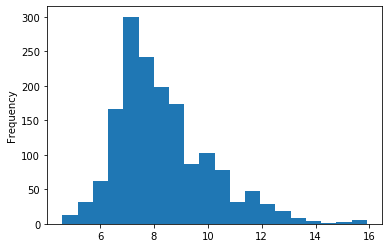

In [7]:
wine["fixed acidity"].plot.hist(bins=20);

- Il grafico evidenzia con che frequenza abbiamo l'acidità fissa. 

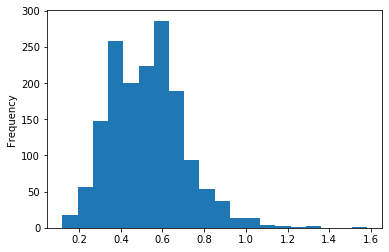

In [8]:
wine["volatile acidity"].plot.hist(bins=20);

- Il grafico evidenzia la frequenza dell'acidità volatile. 

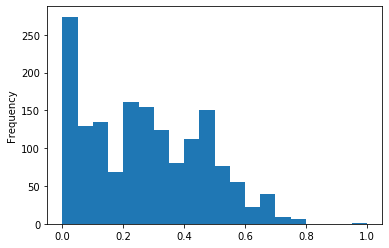

In [9]:
wine["citric acid"].plot.hist(bins=20);

- Il grafico evidenzia la frequenza dell'acido citrico. 

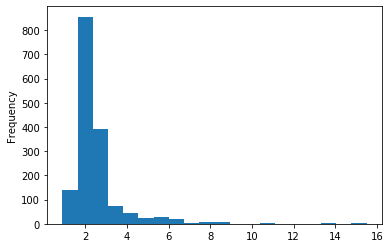

In [10]:
wine["residual sugar"].plot.hist(bins=20);

- Il grafico evidenzia la frequenza dello zucchero residuo. 

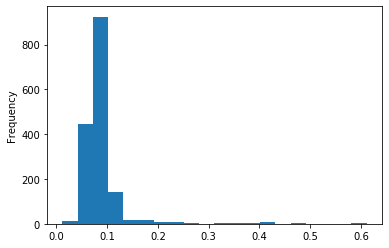

In [11]:

wine["chlorides"].plot.hist(bins=20);

- Il grafico evidenzia la frequenza deli cloruri. 

In [12]:
wine["free sulfur dioxide"].plot.hist(bins=20);

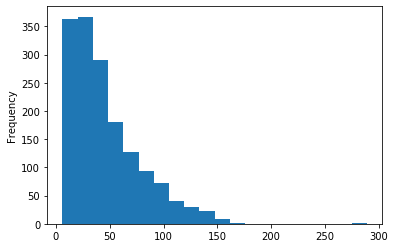

In [13]:
wine["total sulfur dioxide"].plot.hist(bins=20);

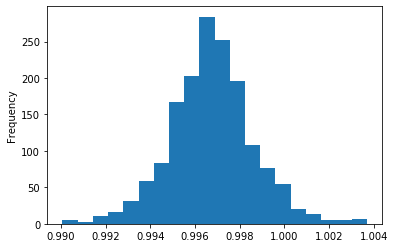

In [14]:
wine["density"].plot.hist(bins=20);

In [15]:
wine["pH"].plot.hist(bins=20);

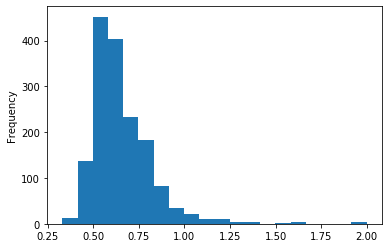

In [16]:
wine["sulphates"].plot.hist(bins=20);

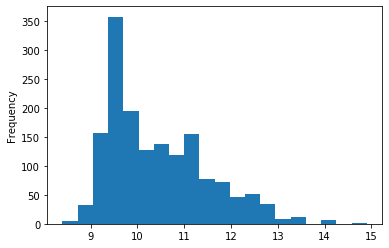

In [17]:
wine["alcohol"].plot.hist(bins=20);

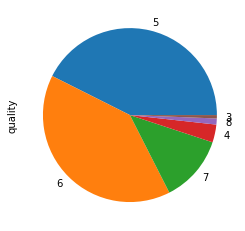

In [18]:
wine["quality"].value_counts().plot.pie();


- Utilizzo un grafico a torta per mostrare la caratteristica qualità come è suddivisa nel dataset

## Grafici a Dispersione
- Visualizzo i grafici a dispersione per ogni caratteristica in relazione alla qualità di ogni vino  

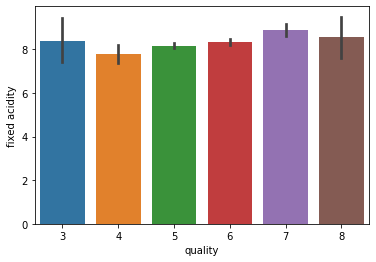

In [19]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine);


- Notiamo che non c'è nessuna correlazione fra la qualità e acidità fissa

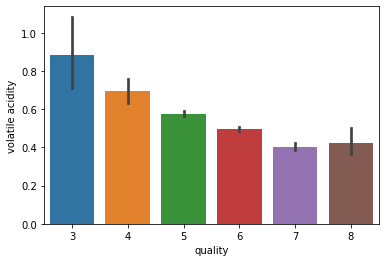

In [20]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine);


- Si nota come sia presente un aumento di qualità ogni talvolta che l'acidità volatile diminuisce 

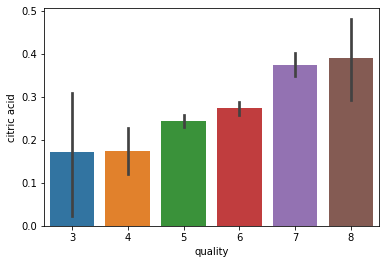

In [21]:

sns.barplot(x = 'quality', y = 'citric acid', data = wine);

- utilizzando wuesto grafico si riesce ad intuire che la qualità aumento quando aumenta acidità citrica

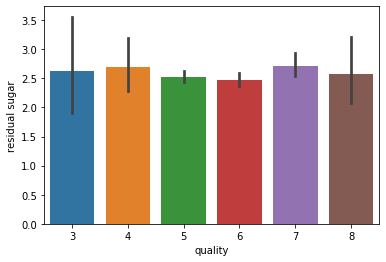

In [22]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine);


- Si noti che non c'è nessuna correlazione fra lo zucchero residuo e la qualità. 

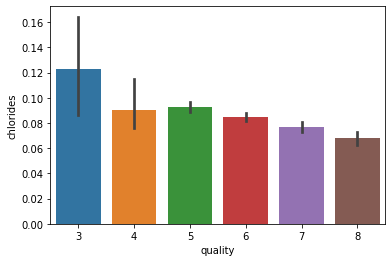

In [23]:

sns.barplot(x = 'quality', y = 'chlorides', data = wine);

- notiamo dal grafico che la qualità aumenta ogni qualvolta la presenza dei cloruri diminuisce 

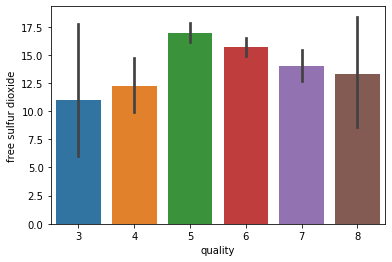

In [24]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine);


- Notiamo che non esiste correlazione  

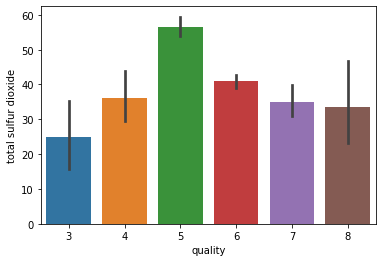

In [25]:

sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine);

In [26]:

sns.barplot(x = 'quality', y = 'sulphates', data = wine);

- Si intuisce grazie a questo grafico che la qualità di un vino aumenta anche in proporzione alla presenza di solfati

In [27]:

sns.barplot(x = 'quality', y = 'alcohol', data = wine);

- Ci accorgiamo che la qualità di un vino aumenta  proporzionalmente all aumentare della presenza di alchool

## Correlazione tra Variabili

- Il grafico a dispersione suggerisce che esista una correlazione tra le due variabili
 
- Come possiamo quantificare questa correlazione?
- Il _coefficiente di correlazione di Pearson_ è un indice usato per valutare numericamente il grado di correlazione tra due variabili X e Y
- Il suo valore è compreso tra -1 e 1
  - valori vicini a 1 indicano correlazione diretta (Y cresce al crescere di X)
  - valori vicini a -1 indicano correlazione inversa (Y descresce al crescere di X)
  - valori vicini a 0 indicano assenza di correlazione


In [28]:
quality=wine["quality"].values

- con `quality` otteniamo solamente i valori della colonna quality in forma di array

In [29]:
fixed_acidity=wine["fixed acidity"].values
np.mean((quality-quality.mean()) * (fixed_acidity-fixed_acidity.mean())) / (quality.std() * fixed_acidity.std())

0.12405164911322429

- calcolo la correlazione fra `fixed acidity` e `quality`. Avendo ottenuto un risultato vicino allo zero posso affermare che la correllazione è praticamente nulla.

In [30]:
volatile_acidity=wine["volatile acidity"].values
np.mean((quality-quality.mean()) * (volatile_acidity-volatile_acidity.mean())) / (quality.std() * volatile_acidity.std())

-0.3905577802640072

- calcolo la correlazione fra `volatile acidity` e `quality`. Avendo ottenuto un risultato negativo posso affermare che fra le due colonne ci sia una leggera correlazione inversa.

In [31]:
citric_acid=wine["citric acid"].values
np.mean((quality-quality.mean()) * (citric_acid-citric_acid.mean())) / (quality.std() * citric_acid.std())

0.22637251431804134

- calcolo la correlazione fra `citric acid` e `quality`. Avendo ottenuto un risultato vicino allo zero posso affermare che la correllazione è leggermente positiva.

In [32]:
residual_sugar=wine["residual sugar"].values
np.mean((quality-quality.mean()) * (residual_sugar-residual_sugar.mean())) / (quality.std() * residual_sugar.std())

0.013731637340066277

- calcolo la correlazione fra `residual sugar` e `quality`. Avendo ottenuto un risultato vicino allo zero posso affermare che la correllazione è praticamente nulla.

In [33]:
chlorides=wine["chlorides"].values
np.mean((quality-quality.mean()) * (chlorides-chlorides.mean())) / (quality.std() * chlorides.std())

-0.1289065599300527

- calcolo la correlazione fra `chlorides` e `quality`. Avendo ottenuto un risultato negativo e vicino allo zero posso affermare che la correllazione è leggermente inversa.

In [34]:
free_sulfur_dioxide=wine["free sulfur dioxide"].values
np.mean((quality-quality.mean()) * (free_sulfur_dioxide-free_sulfur_dioxide.mean())) / (quality.std() * free_sulfur_dioxide.std())

-0.05065605724427635

- calcolo la correlazione fra `free sulfur dioxide` e `quality`. Avendo ottenuto un risultato negativo posso affermare che la correllazione è inversa.

In [35]:
total_sulfur_dioxide=wine["total sulfur dioxide"].values
np.mean((quality-quality.mean()) * (total_sulfur_dioxide-total_sulfur_dioxide.mean())) / (quality.std() * total_sulfur_dioxide.std())

-0.18510028892653782

- calcolo la correlazione fra `total sulfur dioxide` e `quality`. Avendo ottenuto un risultato vicino allo negativo posso affermare che la correllazione è leggermente inversa.

In [36]:
density=wine["density"].values
np.mean((quality-quality.mean()) * (density-density.mean())) / (quality.std() * density.std())

-0.17491922778335012

- calcolo la correlazione fra `density` e `quality`. Avendo ottenuto un risultato negativo e vicino allo zero posso affermare che la correllazione è leggermente inversa.

In [37]:
pH=wine["pH"].values
np.mean((quality-quality.mean()) * (pH-pH.mean())) / (quality.std() * pH.std())

-0.057731391205382156

- calcolo la correlazione fra `pH` e `quality`. Avendo ottenuto un risultato vicino allo zero posso affermare che la correllazione è praticamente nulla.

In [38]:
sulphates=wine["sulphates"].values
np.mean((quality-quality.mean()) * (sulphates-sulphates.mean())) / (quality.std() * sulphates.std())

0.2513970790692614

- calcolo la correlazione fra `sulphates` e `quality`. Avendo ottenuto un risultato positivo posso affermare che la correllazione è diretta.

In [39]:
alcohol=wine["alcohol"].values
np.mean((quality-quality.mean()) * (alcohol-alcohol.mean())) / (quality.std() * alcohol.std())

0.476166324001136

- calcolo la correlazione fra `alchol` e `quality`. Avendo ottenuto un risultato positivo posso affermare che la correllazione è diretta.

## Divisione tra training e validation set

- Dividiamo i dati caricati casualmente in
  - un _training set_ per addestrare i modelli
  - un _validation set_ disgiunto su cui verificare l'accuratezza del modello
- Usiamo la funzione `train_test_split` di scikit-learn
  - con `test_size` indichiamo quanti dati vanno nel validation set, i restanti andranno nel training set
  - con `random_state` fissiamo un seed per la suddivisione casuale
  - la funzione mescola i dati di `X` e `y` in modo congiunto, mantenendo la corrispondenza esistente tra le posizioni dei dati

In [40]:
 y= wine["quality"]
X = wine.drop(columns="quality")

- Assegno alla variabile y la colonna che andrò a predire
- Assengo alla variabile X tutte le colonne tranne quella che andrò a predirre


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=1/3, random_state=42)

## Funzioni per la validazione

Scrivo le funzioni  con le quali andrò a valutare i vari modelli(MSE, errore relativo, R²)


- `MSE` -> mean squared error misura l'errore del modello quando compie una predizione su dati sconosciuti.

-  `ERRORE RELATIVO` -> indica quanto il modello si sbaglia in percentuale rispetto al valore reale. Spesso utilizzato per confrontare vari modelli addestrati su stessi dati:

- `il coeficente R²` è una misura che esprime intuitivamente quanto il modello catturi la variabilità presente nei dati ( 𝑦¯  = media di  𝑌 ).

In [42]:
# importo MSE e R²
from sklearn.metrics import mean_squared_error, r2_score

# definisco funzione per errore relativo
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# funzione per calcolare e stampare tutte e tre
def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

## Normalizzazione 
- I valori dei dati della colonna numeriche potrebbero essere molto discostati l'uno dall'altro. Questo a volte può portare a situazioni indesiderabili negli algoritmi di regressione. Pertanto, normalizzo i dati, portanto i dati di ciascuna colonna compresi tra 0 e 1.

In [43]:

##wine["fixed acidity"] = (wine["fixed acidity"] - np.min(wine["fixed acidity"]))/(np.max(wine["fixed acidity"]) - np.min(wine["fixed acidity"]))
wine["volatile acidity"] = (wine["volatile acidity"] - np.min(wine["volatile acidity"]))/(np.max(wine["volatile acidity"]) - np.min(wine["volatile acidity"]))
wine["citric acid"] = (wine["citric acid"] - np.min(wine["citric acid"]))/(np.max(wine["citric acid"]) - np.min(wine["citric acid"]))
##wine["residual sugar"] = (wine["residual sugar"] - np.min(wine["residual sugar"]))/(np.max(wine["residual sugar"]) - np.min(wine["residual sugar"]))
wine["chlorides"] = (wine["chlorides"] - np.min(wine["chlorides"]))/(np.max(wine["chlorides"]) - np.min(wine["chlorides"]))
#wine["free sulfur dioxide"] = (wine["free sulfur dioxide"] - np.min(wine["free sulfur dioxide"]))/(np.max(wine["free sulfur dioxide"]) - np.min(wine["free sulfur dioxide"]))
#wine["total sulfur dioxide"] = (wine["total sulfur dioxide"] - np.min(wine["total sulfur dioxide"]))/(np.max(wine["total sulfur dioxide"]) - np.min(wine["total sulfur dioxide"]))
#wine["density"] = (wine["density"] - np.min(wine["density"]))/(np.max(wine["density"]) - np.min(wine["density"]))
#wine["pH"] = (wine["pH"] - np.min(wine["pH"]))/(np.max(wine["pH"]) - np.min(wine["pH"]))
wine["sulphates"] = (wine["sulphates"] - np.min(wine["sulphates"]))/(np.max(wine["sulphates"]) - np.min(wine["sulphates"]))
wine["alcohol"] = (wine["alcohol"] - np.min(wine["alcohol"]))/(np.max(wine["alcohol"]) - np.min(wine["alcohol"]))

wine


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4          0.397260         0.00             1.9   0.106845   
1               7.8          0.520548         0.00             2.6   0.143573   
2               7.8          0.438356         0.04             2.3   0.133556   
3              11.2          0.109589         0.56             1.9   0.105175   
4               7.4          0.397260         0.00             1.9   0.106845   
...             ...               ...          ...             ...        ...   
1594            6.2          0.328767         0.08             2.0   0.130217   
1595            5.9          0.294521         0.10             2.2   0.083472   
1596            6.3          0.267123         0.13             2.3   0.106845   
1597            5.9          0.359589         0.12             2.0   0.105175   
1598            6.0          0.130137         0.47             3.6   0.091820   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51   0.137725   
1                    25.0                  67.0  0.99680  3.20   0.209581   
2                    15.0                  54.0  0.99700  3.26   0.191617   
3                    17.0                  60.0  0.99800  3.16   0.149701   
4                    11.0                  34.0  0.99780  3.51   0.137725   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45   0.149701   
1595                 39.0                  51.0  0.99512  3.52   0.257485   
1596                 29.0                  40.0  0.99574  3.42   0.251497   
1597                 32.0                  44.0  0.99547  3.57   0.227545   
1598                 18.0                  42.0  0.99549  3.39   0.197605   

       alcohol  quality  
0     0.153846        5  
1     0.215385        5  
2     0.215385        5  
3     0.215385        6  
4     0.153846        5  
...        ...      ...  
1594  0.323077        5  
1595  0.430769        6  
1596  0.400000        6  
1597  0.276923        5  
1598  0.400000        6  

[1599 rows x 12 columns]

## Regressione Lineare

- La regressione lineare è il modello modello più semplice ma spesso abbastanza efficace per ricavare modelli di predizione

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Valuto il modello utilizzando la funzione creata precedentemente

In [46]:
print_eval(X_val, y_val, lrm)

   Mean squared error: 0.42238
       Relative error: 9.30454%
R-squared coefficient: 0.36143


- Il modello ritorna un valore di $R^2$ del 36% perciò non si adatta ai dati nel migliore dei modi, però ci accorgiamo che la performance risulta eficente in quanto l'errore relativo è molto basso.

#### Coeficente angolare

In [47]:
pd.Series(lrm.coef_, index=wine.columns[:-1])

fixed acidity            0.016435
volatile acidity        -1.045436
citric acid             -0.213246
residual sugar           0.018062
chlorides               -1.698819
free sulfur dioxide      0.003285
total sulfur dioxide    -0.003015
density                -19.222339
pH                      -0.352690
sulphates                0.780541
alcohol                  0.291162
dtype: float64

- Il coefficiente angolare rappresenta la variazione subita in media dalla variabile da predirre all'aumentare di un unitò delle altre colonne.

## Cross validation k fold 
- Divido in modo casuale i dati in k gruppi
- Valido ognuno dei k gruppi su un modello addestrato su i rimanenti gruppi 
- il risultato finale sarà dizionario con un array di lungezza k avente ogni musare estratta.  

In [48]:
from sklearn.model_selection import KFold, cross_validate
kf= KFold(5,shuffle=True, random_state=42)

## Grid Search
- Attraverso la grid search individuo gli iperparametri che massimizzano l'accuratezza del modello.

 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
def grid_search(model, grid):
    gs = GridSearchCV(model, grid, cv=kf)
    gs.fit(X_train, y_train)
    print(gs.best_params_)
    print_eval(X_val, y_val, gs)
    return gs;

## Regressione Polinomiale

- La regressione polinomiale è una generalizzazione di quella lineare in cui il modello include termini di grado superiore.
- Standardizzo i dati perchè in presenza di più variabili con scale diverse, applicare la standardizzazione a ciascuna di esse è utile per uniformarne i valori.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [52]:
poly_model = Pipeline([
    # nome     elemento
    ("poly",   PolynomialFeatures(include_bias=False)),
    ("linreg", LinearRegression())
])
grid_poly={
    "poly__degree":range(2,4)
}
##utilizzo il range due perchè altrimenti tempi di attesa troppo lunghi. Aumentare il range significa aumentare il grado del polinomio

In [53]:
grid_search(poly_model,grid_poly)

{'poly__degree': 2}
   Mean squared error: 0.45539
       Relative error: 9.45179%
R-squared coefficient: 0.31153


C:\Users\ricki\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linreg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None, param_grid={'poly__degree': range(2, 4)},
             pre_dis

- Come possiamo notare, questo modello da risultati peggiori rispetto al lineare, in quanto il coeficente è diminuito e l'errore relativo aumentato

## Regressione Ridge


In [54]:
from sklearn.linear_model import Ridge


In [55]:
ridge_model = Pipeline([
    ("scale",  StandardScaler()),
    ("linreg", Ridge())
])
grid_ridge = {
    "linreg__alpha": [0.1, 1, 2, 3, 4],
}

In [56]:
grid_search(ridge_model,grid_ridge)

{'linreg__alpha': 4}
   Mean squared error: 0.42243
       Relative error: 9.30723%
R-squared coefficient: 0.36137


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linreg',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linreg__alpha': [0.1, 1, 2, 3, 4]},
             pre_dispatch='2*n_jo

## Regressione Lasso
- Con il modello di regressione Lasso addestro un modello ignorando le variabili meno influenti.


In [57]:
from sklearn.linear_model import Lasso

In [58]:
lasso_model = Pipeline([
    ("scale", StandardScaler()),
    ("regr", Lasso())
])
grid_lasso = {
    "regr__alpha": [0.1, 1, 2, 3, 4, 10]
    
}

In [59]:
gs = grid_search(lasso_model, grid_lasso)

{'regr__alpha': 0.1}
   Mean squared error: 0.47568
       Relative error: 10.17408%
R-squared coefficient: 0.28086


In [60]:
lasso = pd.Series(gs.best_estimator_.named_steps["regr"].coef_, X.columns)
lasso

fixed acidity           0.000000
volatile acidity       -0.134105
citric acid             0.000000
residual sugar          0.000000
chlorides              -0.000000
free sulfur dioxide    -0.000000
total sulfur dioxide   -0.000000
density                -0.000000
pH                     -0.000000
sulphates               0.018144
alcohol                 0.270444
dtype: float64

- Ottengo risultati peggiori rispetto agl'altri modelli 

## Regressione Elastic Net 

- Unisce la regolarizzazione Ridge e la Lasso

In [61]:
from sklearn.linear_model import ElasticNet

In [62]:
elastic_model = Pipeline([
    ("scale",  StandardScaler()),
    ("regr", ElasticNet())
])
grid_elastic = {
    "regr__alpha": [0.1, 1, 10],
    "regr__l1_ratio": [0.1, 0.25, 0.5]
}

In [63]:
gs = grid_search(elastic_model, grid_elastic)

{'regr__alpha': 0.1, 'regr__l1_ratio': 0.1}
   Mean squared error: 0.43
       Relative error: 9.49776%
R-squared coefficient: 0.34991


## Regressione con funzioni Kernel

- Utilizzo le funzioni Kernel perchè mi permettono di ottenere modelli non lineari senza introdurre variabili.

In [64]:
from sklearn.kernel_ridge import KernelRidge

In [65]:
kernel_model = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(kernel="poly"))
])
grid_kernel = {
    "regr__degree": range(2, 11),
    "regr__alpha": [0.01, 0.1, 1, 10],
}

In [66]:
gs = grid_search(kernel_model, grid_kernel)

{'regr__alpha': 1, 'regr__degree': 2}
   Mean squared error: 0.41433
       Relative error: 9.17572%
R-squared coefficient: 0.3736


C:\Users\ricki\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


- Ho ottenuto un'accuratezza più elevata rispetto ai modelli lineari.

## Valutazione dei modelli
- Vado ora a valutare con più attenzione i modelli che ho individuato. Scelgo il modello Ridge ed il modello con regressione con funzione Kernel " _poly_ " che ci hanno dato i risultati migliori.

In [67]:
ridge = Pipeline([
    ("poly",   PolynomialFeatures(degree=2, include_bias=False)),
    ("scale",  StandardScaler()),
    ("linreg", Ridge(alpha=0.1))
])
ridge.fit(X_train, y_train);

kernel = Pipeline([
    ("scale", StandardScaler()),
    ("regr",  KernelRidge(alpha=1, kernel="poly", degree=2))
])
kernel.fit(X_train, y_train);

- Valuto ora i modelli 

In [68]:
print("Ridge model Train")
print_eval(X_train, y_train, ridge)
print("--------------------------------")
print("Ridge model Val")
print_eval(X_val, y_val, ridge)
print("================================")
print("Kernel model Train")
print_eval(X_train, y_train, kernel)
print("--------------------------------")
print("Kernel model Val")
print_eval(X_val, y_val, kernel)

Ridge model Train
   Mean squared error: 0.36667
       Relative error: 8.55595%
R-squared coefficient: 0.4326
--------------------------------
Ridge model Val
   Mean squared error: 0.42557
       Relative error: 9.31798%
R-squared coefficient: 0.35661
Kernel model Train
   Mean squared error: 0.36398
       Relative error: 8.52326%
R-squared coefficient: 0.43676
--------------------------------
Kernel model Val
   Mean squared error: 0.41433
       Relative error: 9.17572%
R-squared coefficient: 0.3736


- funzione per calcolare l'intervallo di confidenza predittivo con confidenza del 95%.

In [69]:
def differenza_tra_modelli(error1, error2):
    z = 1.96 
    varianza = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_min = abs(error1 - error2) - z * (pow(varianza, 0.5)) #radice
    d_max = abs(error1 - error2) + z * (pow(varianza, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_min, d_max))

- vado a trovare le differenze fra i vari modelli 

In [70]:
error_ridge = 1 - r2_score(y_val, ridge.predict(X_val))

error_kernel = 1 - r2_score(y_val, kernel.predict(X_val))

differenza_tra_modelli(error_ridge, error_kernel)

Valore minimo: -0.04080912603310588
Valore massimo: 0.07478357715658618



###  In conclusione il modello migliore è quello Kernel perchè ha uno scarto quadratico medio e un errore relativo minore ed un coefficiente di determinazione maggiore.